In [1]:
import numpy as np

import sys

sys.path.append('./pyusct/')

from rfdata import RFdata

import matplotlib.pyplot as plt

%matplotlib inline

## 読み込みテスト

In [5]:
result_path = '/mnt/nas/nb_usctsim/sim_001/trial_001/'

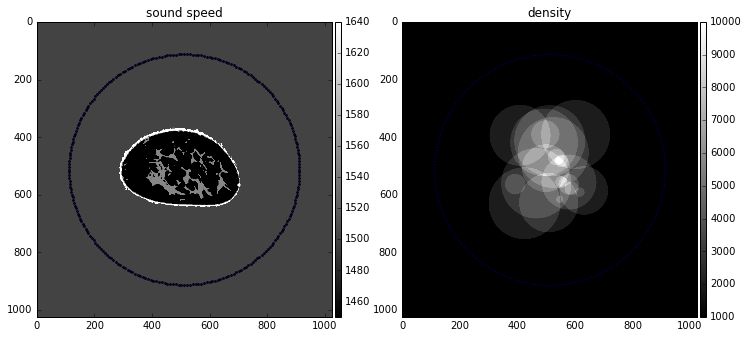

In [41]:
rf = RFdata(result_path)

rf.draw_input()

## サブセット取得

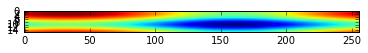

In [47]:
target = [0.01,0.01]
timemap, subset = rf.getPointSubset(target, offset_arr=np.arange(-100,100,1))

plt.imshow(timemap)

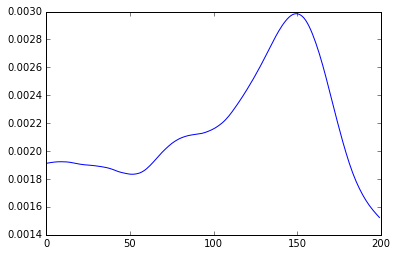

In [48]:
plt.plot(np.mean(np.mean(subset, axis=0), axis=0))

## 透過波除去

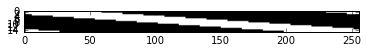

In [49]:
mask = (np.linalg.norm(rf.mesh_pos_rcv - rf.mesh_pos_src, axis=2) < rf.param["ringarray"]["radius"]*1.0 )*1

plt.imshow(mask, cmap='gray')

In [50]:
subset_ = subset * mask[:,:,np.newaxis]
subset_.shape

(16, 256, 200)

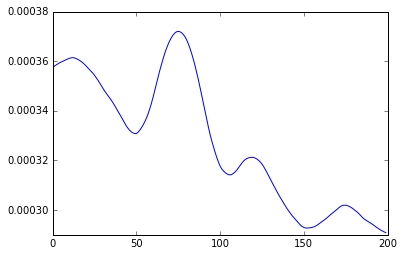

In [51]:
plt.plot(np.mean(np.mean(subset_, axis=0), axis=0))